In [3]:
import numpy as np
import seaborn as sns

In [4]:
def sigmoid(x): 
    return(1/(1+np.exp(-x)))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

In [5]:
class cell:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        self.total = total
        return sigmoid(total)

In [6]:
x = np.array([1,2])
y = 1

In [7]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [8]:
def dloss_y(y,y_pred):
    return(-2*(y-y_pred))

def d(x,node_result):
    return x*deriv_sigmoid(node_result)

In [49]:
def train(x, y, epochs, learning_rate):
    global weight1, weight2, weight3, b1,b2,b3
    weight1 = np.array([.1,.4])
    b1 = -.5

    weight2 = np.array([-1,.7])
    b2 = 1.5

    weight3 = np.array([.9,-.5])
    b3 = 0
    
    mse = []
    
    for epoch in range(epochs):
        node1 = cell(weight1, b1)
        node2 = cell(weight2, b2)
        node3 = cell(weight3, b3)
        y_pred = node3.feedforward([node1.feedforward(x), node2.feedforward(x)])
        
        mse.append(mse_loss(y, y_pred))
        
        dloss_dy = dloss_y(y,y_pred) # the derivatives between lossfunction and ypred
        
        dy_dnode1 = d(weight3[0], node3.total) #the derivatives between ypred and node1
        dy_dnode2 = d(weight3[1], node3.total) #the derivatives between ypred and node2
        
        dnode1_dweight10 = d(weight1[0], node1.total) # the derivatives between node1 and the first weight
        dnode1_dweight11 = d(weight1[1], node1.total) # the derivatives between node1 and the second weight
        dnode1_db = deriv_sigmoid(node1.total) # the derivatives between and the bias
        
        dnode2_dweight20 = d(weight2[0], node2.total) # the derivatives between node2 and its first weight
        dnode2_dweight21 = d(weight2[1], node2.total) # the derivatives between node2 and its second weight
        dnode2_db = deriv_sigmoid(node2.total) # the derivatives between node 2 and its bias
        
        dnode3_dweight30 = d(node1.feedforward(x), node3.total) # the derivatives between node3 and its first weight
        dnode3_dweight31 = d(node2.feedforward(x), node3.total) # the derivatives between node3 and its first weight
        dnode3_db = deriv_sigmoid(node3.total) # the derivatives between node3 and its first weight
        
        #### calculate new weights
        weight1_new = np.array([dloss_dy*dy_dnode1*dnode1_dweight10, dloss_dy*dy_dnode1*dnode1_dweight11])
        weight2_new = np.array([dloss_dy*dy_dnode2*dnode2_dweight20, dloss_dy*dy_dnode2*dnode2_dweight21])
        weight3_new = np.array([dloss_dy*dnode3_dweight30, dloss_dy*dnode3_dweight31])
        
        weight1 -= learning_rate*weight1_new
        weight2 -= learning_rate*weight2_new
        weight3 -= learning_rate*weight3_new
        b1 -= learning_rate*dloss_dy*dy_dnode1* dnode1_db
        b2 -= learning_rate*dloss_dy*dy_dnode2* dnode2_db
        b3 -= learning_rate*dloss_dy*dnode3_db
        
        if epoch % 100 == 0:
            loss= mse_loss(y, y_pred)
            print("Epoch %d loss: %.3f" % (epoch, loss))
    return mse

In [54]:
mse = train(x, y, epochs=1000, learning_rate= 0.5)

Epoch 0 loss: 0.225
Epoch 100 loss: 0.002
Epoch 200 loss: 0.001
Epoch 300 loss: 0.001
Epoch 400 loss: 0.001
Epoch 500 loss: 0.000
Epoch 600 loss: 0.000
Epoch 700 loss: 0.000
Epoch 800 loss: 0.000
Epoch 900 loss: 0.000


<AxesSubplot:>

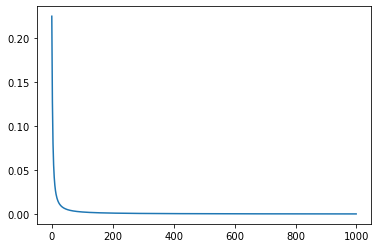

In [56]:
sns.lineplot(x = range(1000), y = mse)

In [31]:
# build another function, use step size =0.01 to find the derivation
def train2(x, y, epochs, learning_rate = 0.5, step_size = 0.01):
    global weight1, weight2, weight3, b1,b2,b3
    weight1 = np.array([.1,.4])
    b1 = -.5

    weight2 = np.array([-1,.7])
    b2 = 1.5

    weight3 = np.array([.9,-.5])
    b3 = 0
    
    mse = []
    
    for epoch in range(epochs):
        node1 = cell(weight1, b1)
        node2 = cell(weight2, b2)
        node3 = cell(weight3, b3)
        y_pred = node3.feedforward([node1.feedforward(x), node2.feedforward(x)])
        
        loss = mse_loss(y, y_pred)
        
        mse.append(loss)
        
        dnode1_weight1 = (node3.feedforward([cell(weight1+np.array([step_size,0]), b1).feedforward(x), node2.feedforward(x)]) - loss)/step_size
        dnode1_weight2 = (node3.feedforward([cell(weight1+np.array([0,step_size]), b1).feedforward(x), node2.feedforward(x)]) - loss)/step_size
        dnode1_b = (node3.feedforward([cell(weight1, b1+step_size).feedforward(x), node2.feedforward(x)]))/step_size
        
        dnode2_weight1 = (node3.feedforward([node1.feedforward(x), cell(weight2+np.array([step_size,0]), b2).feedforward(x)]) - loss)/step_size
        dnode2_weight2 = (node3.feedforward([node1.feedforward(x), cell(weight2+np.array([0,step_size]), b2).feedforward(x)]) - loss)/step_size
        dnode2_b = (node3.feedforward([node1.feedforward(x), cell(weight2, b2+step_size).feedforward(x)]))/step_size
        
        dnode3_weight1 = (cell(weight3+np.array([step_size,0]), b3).feedforward([node1.feedforward(x), node2.feedforward(x)]) - loss)/step_size
        dnode3_weight2 = (cell(weight3+np.array([0,step_size]), b3).feedforward([node1.feedforward(x), node2.feedforward(x)]) - loss)/step_size
        dnode3_b = (cell(weight3, b3+step_size).feedforward([node1.feedforward(x), node2.feedforward(x)]))/step_size
        
        weight1 -= learning_rate*np.array([dnode1_weight1,dnode1_weight2])
        weight2 -= learning_rate*np.array([dnode2_weight1,dnode2_weight2])
        weight3 -= learning_rate*np.array([dnode3_weight1,dnode3_weight2])
        b1 -= learning_rate*dnode1_b
        b2 -= learning_rate*dnode2_b
        b3 -= learning_rate*dnode3_b
        
        if epoch % 2 == 0:
            print("Epoch %d loss: %.3f" % (epoch, loss))
    return mse

In [32]:
mse2 = train2(x, y, epochs=30, learning_rate= 0.5, step_size = 0.01)

Epoch 0 loss: 0.225
Epoch 2 loss: 0.000
Epoch 4 loss: 0.996
Epoch 6 loss: 1.000
Epoch 8 loss: 1.000
Epoch 10 loss: 0.000
Epoch 12 loss: 0.000
Epoch 14 loss: 0.999
Epoch 16 loss: 1.000
Epoch 18 loss: 1.000
Epoch 20 loss: 0.000
Epoch 22 loss: 0.000
Epoch 24 loss: 0.999
Epoch 26 loss: 1.000
Epoch 28 loss: 1.000


<AxesSubplot:>

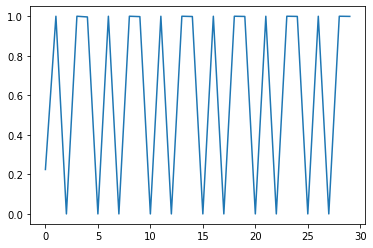

In [33]:
sns.lineplot(x = range(30), y = mse2)